Задание продвинутого уровня


##Шаг 1: Создание датафрейма.
Датафрейм должен содержать колонки order_id, order_price и products.
order_price получен из предобработанного датасета, products формируется из исходных датасетов orders.csv и products.csv.

In [ ]:
import pandas as pd

data_path = '/content/drive/MyDrive/ML/TUSUR_ML/#3_regression&clustering/clustering_&_dimensionality_reduction/data/'

# загрузка предобработанного датасета и выбор необходимых колонок
prep_df = pd.read_csv(data_path + 'prepared_ds.csv', index_col=0)
df = prep_df[['order_id', 'order_price']].copy()

# загрузка изначального датасета и выбор необходимых колонок
orders_df = pd.read_csv(data_path + 'orders.csv')
order_products_df = orders_df[['order_id', 'product_id']].copy()

# загрузка датасета с названием продуктов
products_df = pd.read_csv(data_path + 'products.csv')

# получение названия продуктов по id
products_map = products_df.set_index('product_id')['product_name'].to_dict()
order_products_df.loc[:, 'product_name'] = order_products_df['product_id'].map(products_map)

# чтобы при кластеризации продукты состоящие из несколльких слов считалиь одним продуктом, заменим ' ' на '_'
order_products_df['product_name'] = order_products_df['product_name'].str.replace(' ', '_')

# объединение всех продуктов одного заказа в один признак
product_df_ = order_products_df.groupby('order_id')['product_name'].apply(', '.join).reset_index()
product_df_.rename(columns={'product_name': 'products'}, inplace=True)

# объединение product_df_ и df
products_map = product_df_.set_index('order_id')['products'].to_dict()
df.loc[:, 'products'] = df['order_id'].map(products_map)

df.head(5)

,order_id,order_price,products
0,20562761,30.49,"Nachos, Curry"
1,20562753,60.21,"Soup, Salad"
2,20562723,8.27,Sushi
3,20562673,24.68,"Burrito, Wrap"
4,20562665,14.02,Frittata


Убеждаемся в отсутствии дубликатов (сравниваем кол-во строк).

In [ ]:
prep_df.shape

(7787, 21)

In [ ]:
df.shape

(7787, 3)

#Шаг 2: С помощью TF-IDF создать числовое представление для товаров из колонки «products».

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df.products)
terms = vectorizer.get_feature_names_out()

# преобразуем разреженную матрицу в датафрейм и добавим колонку order_price
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms, index = df['order_price'])

In [17]:
tfidf_df

,avocado_toast,bagel,banh_mi,bbq_ribs,biscuit,brownie,burger,burrito,carrot,cereal,...,spring_rolls,steak,sushi,tacos,tempura,toast,tortilla,waffle,wrap,yogurt
order_price,,,,,,,,,,,,,,,,,,,,,
30.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
60.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
8.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
24.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.708851,0.0,0.000000,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.705358,0.0
14.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444479,0.0,0.000000,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
21.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.698057,0.0,0.0,0.0,0.716042,0.000000,0.0
102.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.452753,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


#Шаг 3: Понижение размерности полученного датафрейма с помощью UMAP.

In [ ]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [18]:
from umap import UMAP

reducer = UMAP(n_components=3, metric='cosine')

tfidf_reduced = reducer.fit_transform(tfidf_df)
reduced_df = pd.DataFrame(tfidf_reduced)

reduced_df

,0,1,2
0,-3.922954,0.373178,0.311061
1,-2.767579,6.541144,5.386502
2,-4.629188,1.122855,5.210922
3,-0.620525,0.436098,0.109525
4,-5.362227,7.389678,-1.361920
...,...,...,...
7782,-4.214803,0.555002,0.352252
7783,-1.426855,4.201411,-0.554907
7784,-0.637711,7.421906,1.161805
7785,1.640228,4.207667,-4.520517


#Шаг 4: Определить начальное количество кластеров, нтерпретировать результат.
Для эго используется метод силуэта.

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
# проходим по различным значениям количества кластеров и вычисляем индекс силуэта
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = kmeans.fit_predict(reduced_df)
    silhouette_avg = silhouette_score(reduced_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

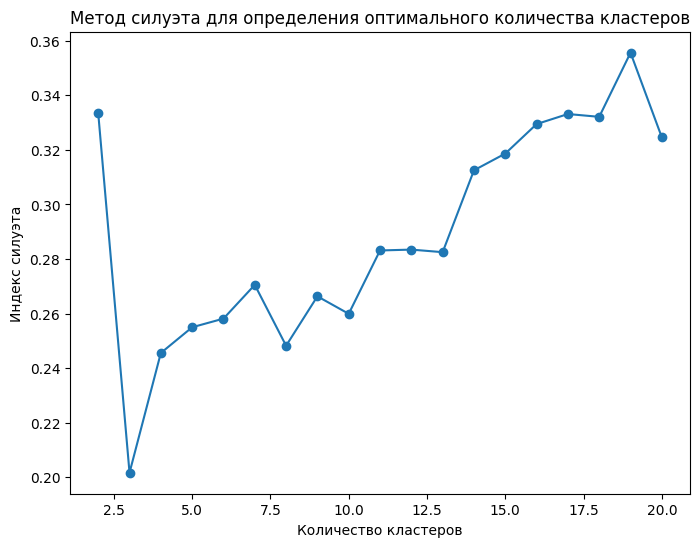

In [20]:
import matplotlib.pyplot as plt

# Визуализация результатов
plt.figure(figsize = (8, 6))
plt.plot(range(2, 21), silhouette_scores, marker = 'o')
plt.xlabel('Количество кластеров')
plt.ylabel('Индекс силуэта')
plt.title('Метод силуэта для определения оптимального количества кластеров')
plt.show()

Индекс силуэта принимает максимальное значение на 19 кластерах. Будем считать 19 оптимальным количеством кластрев.

#Шаг 5: Кластеризация с помощью К-Means при количестве кластеров - 19.

In [23]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

kmeans = KMeans(19)
predictions = kmeans.fit_predict(reduced_df)
silhouette = silhouette_score(reduced_df, predictions)
db = davies_bouldin_score(reduced_df, predictions)
sh = calinski_harabasz_score(reduced_df, predictions)
print(f'Оценка силуэта: {silhouette},\nИндекс Дэвиса-Болдина: {db},\nИндекс Калинского-Харабаза: {sh}')

Оценка силуэта: 0.3474373519420624,
Индекс Дэвиса-Болдина: 0.8630135157174728,
Индекс Калинского-Харабаза: 2525.718029406262


Исходя из метрик можно сделать вывод об умеренном качестве кластеризации: значение индексов Дэвиса-Болдина и Калинского-Харабаза указывают на то, что кластеры достаточно хорошо разделены и компактны.

#Шаг 6: Визуальное отображение наиболее значимых слов в кластере.

In [24]:
from wordcloud import WordCloud
import numpy as np

labels = kmeans.fit_predict(tfidf_df)
df['cluster'] = labels
words = tfidf_df.columns

In [25]:
# Проходим по каждому кластеру
for cluster in np.unique(labels):
    # Извлекаем индексы документов, принадлежащих текущему кластеру
    cluster_docs_indices = np.where(labels == cluster)[0]
    tfidf_cluster = tfidf_df.iloc[cluster_docs_indices].sum(axis=0)


    # Преобразуем в словарь: ключи - слова, значения - веса
    tfidf_cluster_dict = {words[i]: tfidf_cluster[i] for i in range(tfidf_cluster.shape[0])}


    # Создаем WordCloud для текущего кластера
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_cluster_dict)

    # Отображаем WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster} Word Cloud')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.